Aim: 
- check how strong spatial autocorrelation is for HCMC survey data
- test for global autocorrelation
- test for local autocorrelatin ( local Morans I - check visually)

Targets: degree and chance of loss, business reduction


In [235]:
import pandas as pd
import geopandas as gpd
import numpy as np
import shapely
from shapely.geometry import Point, Polygon

import libpysal as lps
import pysal as ps
import esda
from scipy.spatial import Voronoi, voronoi_plot_2d
#from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area
from geovoronoi import voronoi_regions_from_coords, coords_to_points, points_to_coords

import contextily as cx
import mplleaflet as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors

%matplotlib inline

target = ["Target_relative_contentloss_euro", "Target_businessreduction"] [1]

In [236]:
#df_candidates = pd.read_excel("../input_survey_data/input_data_contentloss_tueb.xlsx")
#df_candidates = pd.read_excel("../input_survey_data/all-attributes_shophouses.xlsx")
df_candidates = pd.read_excel("../input_survey_data/input_data_businessreduction_tueb.xlsx")

# define as geoDF
df_candidates["geometry"] = gpd.GeoSeries.from_wkt(df_candidates["geometry"])
df_candidates = gpd.GeoDataFrame(df_candidates, crs="EPSG:4326", geometry="geometry")
print(df_candidates.shape)

## set CRS to cartesian [m, web-mercator]
df_candidates = df_candidates.to_crs(3857)  

df = df_candidates

## get degree of loss
if target == "Target_relative_contentloss_euro":
    df = df.loc[df[target] > 0.000, :]




(356, 15)


In [237]:
## prepare for spatial analysis

dff = df[ ~df.is_empty] # df[df['geometry'].is_empty & df["geometry"].notna()]
dff = dff[dff[target].notna()]

print(dff.shape)
dff.tail(2)

(114, 15)


,Target_businessreduction,inundation_duration_h,water_depth_cm,flowvelocity,contaminations,flood_experience,bage,b_area,geometry,emergency_measures,precautionary_measures_lowcost,precautionary_measures_expensive,shp_employees,resilience,shp_avgmonthly_sale_euro
329,20,79.0,70.0,0.4,1,76,7.0,80.0,POINT (11869881.805 1200661.638),0.500000,0.75,0.0,2,3.333333,736.5
352,30,5.0,40.0,0.2,1,151,1.0,80.0,POINT (11876844.213 1193626.011),0.666667,0.50,0.0,2,2.000000,276.2


## spatial lag

In [238]:
## Plot spaital lag of morans i

# np.random.seed(12345)
# import esda
# wq.transform = 'r'
# lag_price = lps.weights.lag_spatial(wq, df['median_pri'])

# price = df['median_pri']
# b, a = np.polyfit(price, lag_price, 1)
# f, ax = plt.subplots(1, figsize=(9, 9))

# plt.plot(price, lag_price, '.', color='firebrick')

#  # dashed vert at mean of the price
# plt.vlines(price.mean(), lag_price.min(), lag_price.max(), linestyle='--')
#  # dashed horizontal at mean of lagged price
# plt.hlines(lag_price.mean(), price.min(), price.max(), linestyle='--')

# # red line of best fit using global I as slope
# plt.plot(price, a + b*price, 'r')
# plt.title('Moran Scatterplot')
# plt.ylabel('Spatial Lag of Price')
# plt.xlabel('Price')
# plt.show()



## Global Moran’s I 

cide snippets: https://pysal.org/esda/notebooks/spatialautocorrelation.html

In [257]:
## use survey data points for weights creation - using KNN or DistanceBand neighborhodd definition

# wq =  lps.weights.Queen.from_dataframe(dff)
#wq.transform = 'b'

wq =  lps.weights.DistanceBand.from_dataframe(dff, alpha=-1.0, threshold=50)  # threshold in meters
#wq =  lps.weights.DistanceBand.from_dataframe(dff, alpha=-1.0, threshold=0.06)  # def -1.0
wq.transform = 'r'

## use voronoi polygons for weights creation - using Queens neighborhodd defnition

# wq = lps.weights.contiguity.Queen.from_dataframe(df)
#.lib.weights.Queen.from_dataframe(df)
# wq.transform = 'r'



('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 47, ' is an island (no neighbors)')
('WARNING: ', 71, ' is an island (no neighbors)')
('WARNING: ', 74, ' is an island (no neighbors)')
('WARNING: ', 83, ' is an island (no neighbors)')
('WARNING: ', 84, ' is an island (no neighbors)')
('WARNING: ', 94, ' is an island (no neighbors)')
(

c:\Anaconda\envs\py396_c3\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 64 disconnected components.
 There are 51 islands with ids: 8, 13, 17, 28, 31, 32, 33, 35, 36, 37, 38, 39, 45, 46, 47, 71, 74, 83, 84, 94, 107, 117, 131, 137, 162, 165, 218, 225, 230, 232, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 269, 272, 279, 285, 295, 312, 325, 328, 352.
  warnings.warn(message)


Median of direct loss cost from most serious floods 10.0


C:\Users\Anna\AppData\Local\Temp\ipykernel_13196\152793237.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(mi.sim, shade=True)


Global Moran's I 0.05784355405755611
p-value: 0.282
z-score :


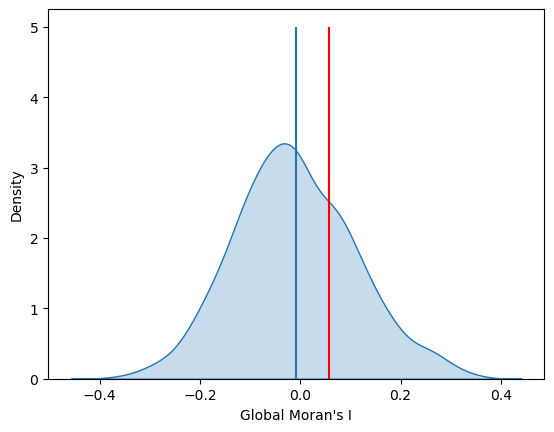

In [259]:
print("Median of direct loss cost from most serious floods", df[target].median())

## Moran’s I is a test for global autocorrelation for a continuous attribute:
#np.random.seed(12345)
mi = esda.moran.Moran(dff[target], wq)

sns.kdeplot(mi.sim, shade=True)
plt.vlines(mi.I, 0, 5, color='r')
plt.vlines(mi.EI, 0,5)
plt.xlabel("Global Moran's I")

print("Global Moran's I", mi.I)  # = red == observed value


print("p-value:", mi.p_sim)  # significant <=0.05
print("z-score :")  #  statement with a given level of confidence about whether or not we reject or accept the null hypothesis. 



### Global Morans I: Degree of loss and  Business reduction
--> pseudo p-vlaue is not signifcant for degree of loss and also not business reduction -->  observed spatial distribution doestn differ sign. from random permuated spatial distrbution --> no global spatial autocorrelation exist



## Local Moran’s I 

code snippets from: https://pysal.org/esda/notebooks/spatialautocorrelation.html

In [261]:
## same weights as for global Morans I

# dff = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_wkt(df["geometry"]))
# wq =  lps.weights.DistanceBand.from_dataframe(dff, alpha=-1.0, threshold=0.06)  # def -1.0
# wq.transform = 'r'

In [262]:
li = esda.moran.Moran_Local(dff[target], wq)
li.q


c:\Anaconda\envs\py396_c3\lib\site-packages\esda\moran.py:1057: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


array([3, 2, 2, 2, 3, 3, 4, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 1, 3,
       3, 3, 3, 3, 1, 3, 3, 3, 2, 2, 4, 3, 4, 4, 2, 3, 3, 3, 1, 4, 2, 2,
       3, 3, 4, 1, 1, 3, 3, 2, 2, 3, 1, 2, 1, 2, 2, 1, 4, 4, 1, 1, 3, 1,
       3, 3, 4, 2, 4, 3, 2, 2, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3,
       4, 3, 3, 4, 4, 3, 4, 4, 3, 4, 1, 1, 4, 1, 3, 2, 3, 1, 2, 1, 4, 1,
       4, 3, 2, 4])

In [263]:
# We can again test for local clustering using permutations, but here we use conditional random permutations (different distributions for each focal location)

print((li.p_sim < 0.05).sum())  # pint all signifcant cases of local clustering


64


In [264]:

# We can distinguish the specific type of local spatial association reflected in the four quadrants of the Moran Scatterplot above:

sig = li.p_sim < 0.05
hotspot = sig * li.q==1
coldspot = sig * li.q==3
doughnut = sig * li.q==2
diamond = sig * li.q==4

# set new crs whic is needed for background map
# dff_plot = dff.set_crs("EPSG:4326")


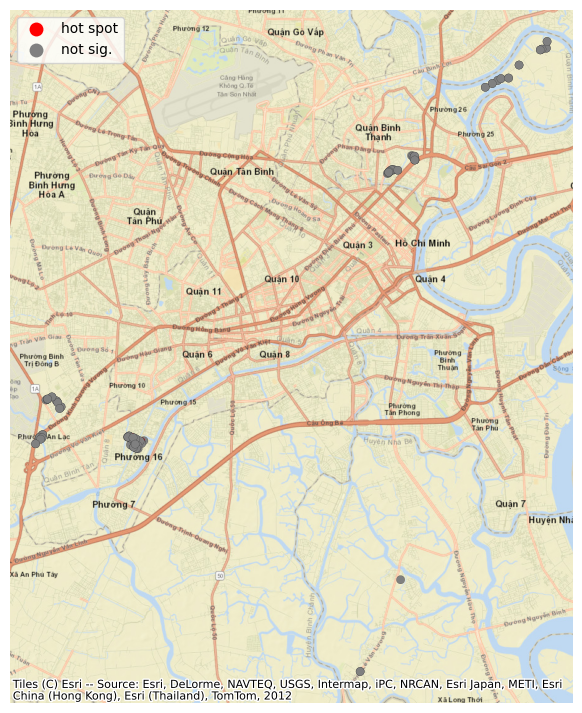

In [268]:

spots = ['not sig.', 'hot spot']
labels = [spots[i] for i in hotspot*1]

hmap = colors.ListedColormap(['red', 'grey'])
f, ax = plt.subplots(1, figsize=(9, 9))
dff.assign(cl=labels).plot(column='cl', categorical=True,
        k=2, cmap=hmap, linewidth=0.1, ax=ax,
        edgecolor='black', legend=True)
ax.set_axis_off()
cx.add_basemap(ax, crs='EPSG:3857', source=cx.providers.Esri.WorldStreetMap)#, zoom=15) #,crs='EPSG:4326')#,  , source=cx.providers.TomTom.Basic)  .MapTiler.

plt.show()



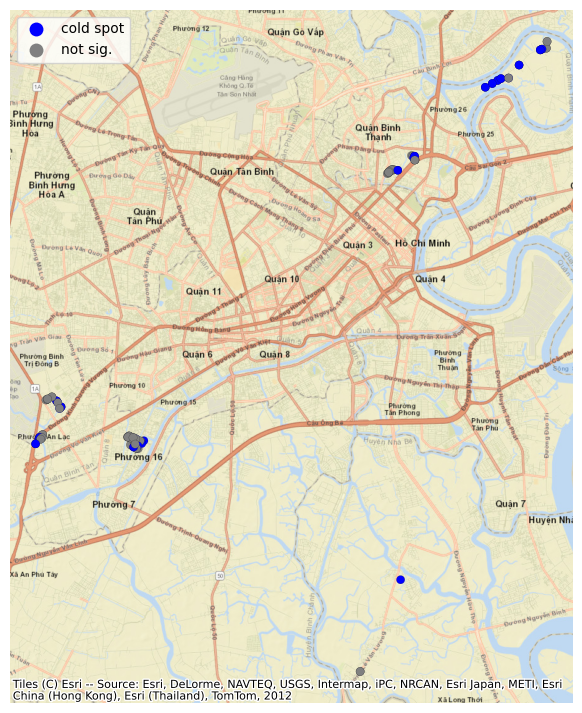

In [266]:
spots = ['not sig.', 'cold spot']
labels = [spots[i] for i in coldspot*1]

hmap = colors.ListedColormap(['blue', 'grey'])
f, ax = plt.subplots(1, figsize=(9, 9))
dff.assign(cl=labels).plot(column='cl', categorical=True, 
        k=2, cmap=hmap, linewidth=0.1, ax=ax, 
        edgecolor='black', legend=True)
ax.set_axis_off()
cx.add_basemap(ax, crs='EPSG:3857', source=cx.providers.Esri.WorldStreetMap)#, zoom=15) #,crs='EPSG:4326')#,  , source=cx.providers.TomTom.Basic)  .MapTiler.

plt.show()



In [269]:
spots = ['n.sig.', 'diamond']
labels = [spots[i] for i in diamond*1]

hmap = colors.ListedColormap(['pink', 'grey'])
f, ax = plt.subplots(1, figsize=(9, 9))
dff.assign(cl=labels).plot(column='cl', categorical=True, 
        k=2, cmap=hmap, linewidth=0.1, ax=ax, 
        edgecolor='black', legend=True)
ax.set_axis_off()
cx.add_basemap(ax, crs='EPSG:3857', source=cx.providers.Esri.WorldStreetMap)#, zoom=15) #,crs='EPSG:4326')#,  , source=cx.providers.TomTom.Basic)  .MapTiler.

plt.show()

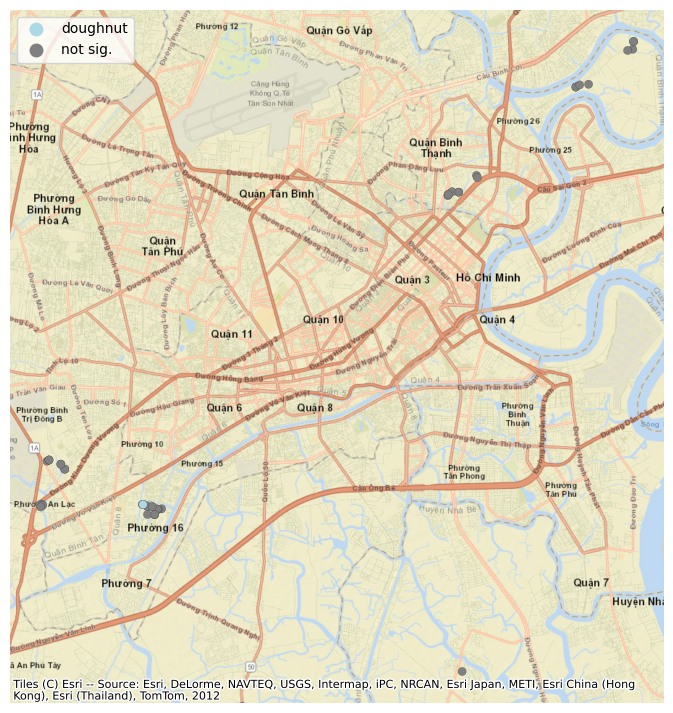

In [213]:
spots = ['not sig.', 'doughnut']
labels = [spots[i] for i in doughnut*1]

hmap = colors.ListedColormap(['lightblue', 'grey'])
f, ax = plt.subplots(1, figsize=(9, 9))
dff.assign(cl=labels).plot(column='cl', categorical=True, 
        k=2, cmap=hmap, linewidth=0.1, ax=ax, 
        edgecolor='black', legend=True)
# ax = dff_plot.assign(cl=labels).plot(column='cl', categorical=True,
#         k=2, cmap=hmap, linewidth=0.3, ax=ax,
#        edgecolor='black', legend=True)
ax.set_axis_off()
cx.add_basemap(ax, crs='EPSG:3857', source=cx.providers.Esri.WorldStreetMap)#, zoom=15) #,crs='EPSG:4326')#,  , source=cx.providers.TomTom.Basic)  .MapTiler.
                         

plt.show()

#### Summarize local autocorrelation for target 

- direct loss costs for business contents are clustering for the observed area of HCMC
- clusters of very high as also for very low loss costs exists
- within the hot spot (in north-east) quite many businesses occure with unexpected low loss costs
- both clusters of high and low loss costs seems to be located around tributaries of the Mekong - but this assumtion needs to be examined more if really high water levels from the tributary rivers influence the loss costs



## chance of loss - check local spatial autocorrelation for binary variable

One way to formalize a test for spatial autocorrelation in a binary attribute is to consider the so-called joins. A join exists for each neighbor pair of observations, and the joins are reflected in our binary spatial weights object wq.



In [250]:
dff_binary = df_candidates

## prepare
dff_binary = dff_binary[ ~dff_binary.is_empty] # df[df['geometry'].is_empty & df["geometry"].notna()]
dff_binary = dff_binary[dff_binary[target].notna()]

In [251]:
dff_binary.loc[dff_binary[target] == 0.000000, target ] = 0
dff_binary.loc[dff_binary[target] > 0.0, target ] = 1
dff_binary.describe()

,Target_businessreduction,inundation_duration_h,water_depth_cm,flowvelocity,contaminations,flood_experience,bage,b_area,emergency_measures,precautionary_measures_lowcost,precautionary_measures_expensive,shp_employees,resilience,shp_avgmonthly_sale_euro
count,114.000000,110.000000,114.000000,114.000000,114.000000,114.000000,100.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,0.649123,10.815455,37.105263,0.320175,1.026316,70.535088,22.340000,87.753509,0.365497,0.293860,0.134503,1.903509,2.929825,348.079825
std,0.479352,29.609019,27.404983,0.127036,0.386967,57.264667,15.226386,88.115139,0.232423,0.235757,0.175821,1.522511,1.161894,335.130554
min,0.000000,0.200000,1.000000,0.100000,0.000000,3.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.666667,92.100000
25%,0.000000,2.000000,16.250000,0.200000,1.000000,16.000000,12.000000,43.500000,0.166667,0.000000,0.000000,1.000000,2.000000,92.100000
50%,1.000000,4.000000,40.000000,0.300000,1.000000,36.000000,20.000000,80.000000,0.500000,0.250000,0.000000,1.000000,3.000000,276.200000
75%,1.000000,6.750000,50.000000,0.400000,1.000000,151.000000,29.000000,108.000000,0.500000,0.500000,0.333333,2.000000,4.000000,276.200000
max,1.000000,240.000000,150.000000,0.500000,2.000000,151.000000,66.000000,850.000000,0.833333,0.750000,0.666667,9.000000,5.000000,1473.000000


<Axes: >

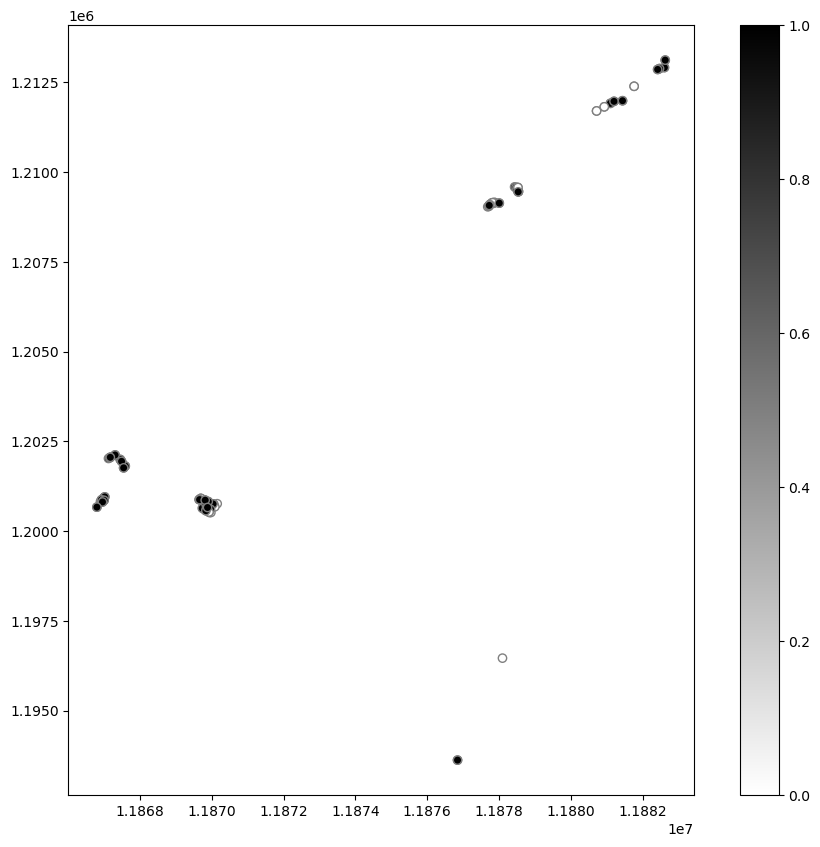

In [252]:
## check visually spatial distribution

fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
dff_binary.plot(column=target, cmap='binary', edgecolor='grey', alpha=1, legend=True, ax=ax)

--> local biary clusters might exists, but overlap which makes visual assessment less easy

In [253]:
## set weights for binary target

wq =  lps.weights.DistanceBand.from_dataframe(dff_binary, alpha=-1.0, threshold=200)  # def -1.0
wq.transform = 'b'

c:\Anaconda\envs\py396_c3\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 18 disconnected components.
 There are 11 islands with ids: 28, 36, 37, 39, 218, 225, 240, 245, 246, 248, 352.
  warnings.warn(message)


In [254]:
np.random.seed(42)
jc = esda.join_counts.Join_Counts(dff_binary[target], wq)


In [255]:
# The resulting object stores the observed counts for the different types of joins:

print( "zero-zero, damage-damage, zero-damage:", jc.bb, jc.ww, jc.bw)


zero-zero, damage-damage, zero-damage: 238.0 73.0 207.0


In [256]:
# The average number of zero-zero and damag-damage joins from the synthetic realizations is (permuation to see what i mean when spatial distribuition would be random):
print(jc.mean_bb, jc.mean_bw)
print("p-value:", jc.p_sim_bb)

## -> ranodm distribution of chance of loss is similar as observed distirbution --> probably no spatial autocorrelation exist
##  pseudo p-value is not signifcant --> accept null hypo

217.5955955955956 237.77277277277278
p-value: 0.155


C:\Users\Anna\AppData\Local\Temp\ipykernel_13196\3918880325.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(jc.sim_bb, shade=True)


Text(0.5, 0, 'BB Counts')

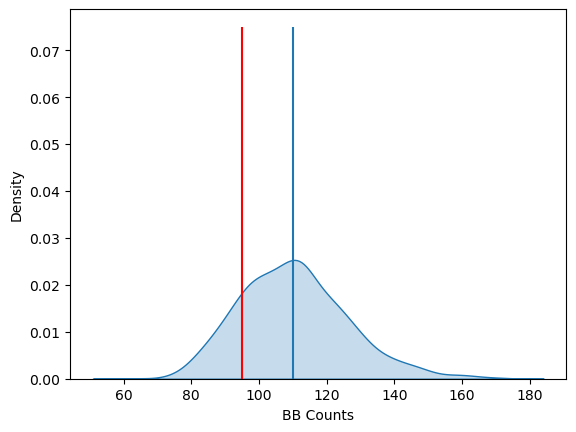

In [230]:
# The question is whether our observed value is so different from the expectation that we would reject the null of CSR?


import seaborn as sbn
sbn.kdeplot(jc.sim_bb, shade=True)
plt.vlines(jc.bb, 0, 0.075, color='r')
plt.vlines(jc.mean_bb, 0,0.075)
plt.xlabel('BB Counts')